# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [5]:
import os
import pandas as pd

training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [6]:
training_data = pd.read_csv(training_data_path)
training_targets = pd.read_csv(training_targets_path)

training_data.info()

training_targets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016480F8CC70>,
      dtype=object)

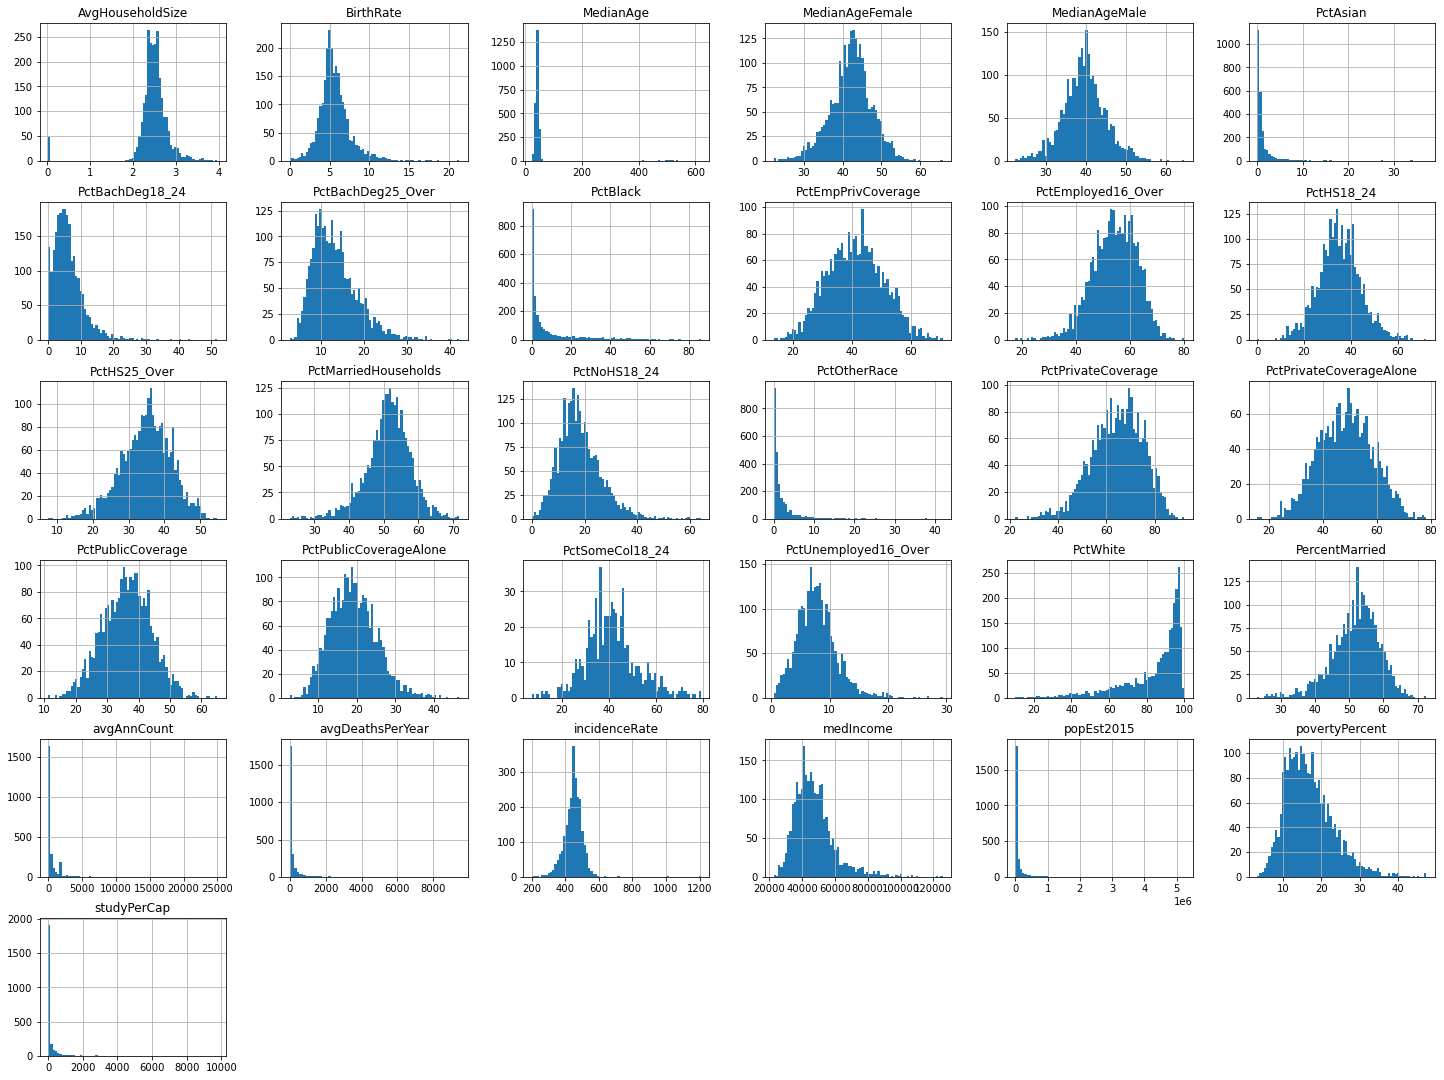

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

training_data.hist(bins=75,figsize=(25,19))

While the average household size is between 2-3 people, some counties are outliers with a value very close to 0. This could suggest the household sizes for these outliers weren’t inputted properly, which means they should be dealt with in the pre-processing pipeline.

The next histogram shows outliers in birth rate above 15.

The next histogram shows outliers where the median age is higher than 400, which is not possible suggesting errors in data entry, hence this data must be later adjusted accordingly.

There are outliers where the median age is above 60 in the male and female histograms.

Counties with a percentage bachelor’s degree for ages between 18-24 and above 25 will later be capped accordingly to avoid overfitting.

Using the .info method on the training data shows a lot of missing values in the 'PctSomeCol18_24' and 'PctPrivateCoverageAlone' columns, which will replaced with the median value during pre-processing.

In [8]:
t = [training_data, training_targets]
TrainT = pd.concat(t,axis=1)
corr_matrix=TrainT.corr()
corr_matrix["TARGET_deathRate"].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
povertyPercent             0.413260
PctHS25_Over               0.409915
PctPublicCoverage          0.391899
PctUnemployed16_Over       0.362612
PctHS18_24                 0.266285
PctBlack                   0.236380
PctNoHS18_24               0.090565
MedianAgeFemale            0.008665
MedianAge                 -0.000039
studyPerCap               -0.024729
MedianAgeMale             -0.027263
AvgHouseholdSize          -0.045545
BirthRate                 -0.088543
avgDeathsPerYear          -0.094048
popEst2015                -0.130122
avgAnnCount               -0.150019
PctWhite                  -0.174521
PctAsian                  -0.181948
PctOtherRace              -0.182602
PctSomeCol18_24           -0.186140
PctEmpPrivCoverage        -0.259006
PercentMarried            -0.266153
PctBachDeg18_24           -0.284566
PctMarriedHouseholds      -0.290645
PctPrivateCoverageAlone   -0

From the correlation matrix we can see that the top 5 features with the strongest correlation to the targets are: "incidenceRate", "PctPublicCoverageAlone", "povertyPercent", "PctHS25_Over", "PctPublicCoverage". 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016482F29CD0>,
      dtype=object)

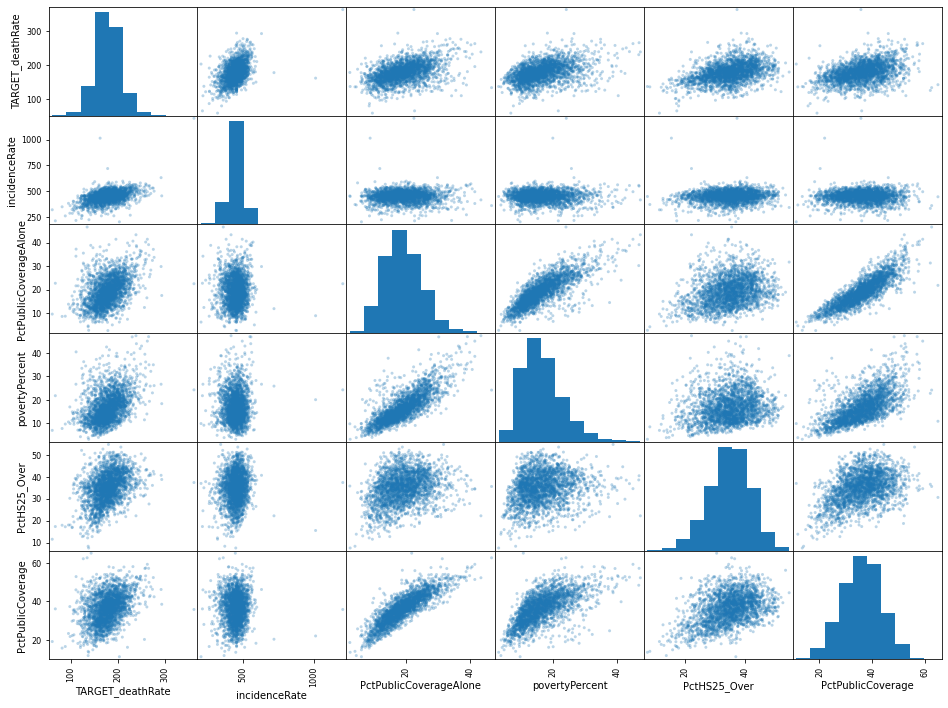

In [9]:
from pandas.plotting import scatter_matrix

attributes=["TARGET_deathRate","incidenceRate","PctPublicCoverageAlone","povertyPercent","PctHS25_Over","PctPublicCoverage"]

scatter_matrix(TrainT[attributes],figsize=(16,12), alpha = 0.3)

From the scatter plots we can confirm that incidence rate positively correlates with 'TARGET_death rate' as expected. We see that there is a correlation with poverty percentage of a county and 'TARGET_death rate'. This could be due to lack of access to quality healthcare, which would result in a later diagnosis or worse treatment. 

We can see positive correlation between 'PctPublicCoverageAlone' and 'TARGET_death rate', which could also be due to the reasons stated above.

There is clear positive correlation between 'PctPublicCoverageAlone' and 'povertyPercent' which is understandable as the counties where more people are in poverty would need more reliance on public healthcare.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

train_set, test_set = train_test_split(training_data, test_size= 0.3, random_state=38)
train_targets, test_targets = train_test_split(training_targets, test_size= 0.3, random_state=38)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
class outlier_cap(BaseEstimator):
    
    def __init__(self):
        self=self
                
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X,columns=training_data.columns)
        
        upper_limit = X.mean() + 3*X.std()
        lower_limit = X.mean() - 3*X.std()
        
        X = np.where(X>upper_limit,
        upper_limit,
        np.where(
           X < lower_limit,
           np.where(lower_limit<0,
                    0,
                    lower_limit),
           X
            )
        )

        return X

    
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('outlier_cap',outlier_cap()),
    ('outlier_cap2',outlier_cap()),
    ('outlier_cap3',outlier_cap()),
    ('std_scaler',StandardScaler())
])

training_data_prepared = pipeline.fit_transform(train_set)
training_data_prepared = pd.DataFrame(training_data_prepared,columns=training_data.columns)

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


First, we use linear regression to predict the target from the first 5 rows to see what it looks like on the dataset.

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(training_data_prepared, train_targets)

some_data_prepared=training_data_prepared.iloc[:5]
some_labels=train_targets.iloc[:5]
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", (some_labels))

from sklearn.metrics import mean_squared_error
lin_reg_predictions = lin_reg.predict(training_data_prepared)
lin_mse=mean_squared_error(train_targets, lin_reg_predictions)
lin_rmse=np.sqrt(lin_mse)
print("Linear regression RMSE:",lin_rmse)

Predictions: [[198.21603495]
 [179.49915065]
 [149.83867455]
 [169.45704945]
 [164.32556201]]
Labels:       TARGET_deathRate
1872             212.4
1735             223.4
1580             185.9
1587             144.9
502              143.9
Linear regression RMSE: 19.252376474979137


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, training_data_prepared,train_targets,scoring="neg_mean_squared_error",cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

print("Linear regression cross-validated scores:")    
display_scores(lin_reg_rmse_scores)

Linear regression cross-validated scores:
Scores: [19.38919519 19.65996551 20.53106164 22.64247994 16.96073138 20.94827524
 19.42636264 18.58825076 19.23227742 19.68346898]
Mean: 19.706206868115647
Standard deviation: 1.4155689264240252



For Lasso and Ridge regression, first we use lasso cross validation and ridge cross validation to find suitable regularisation weights for Lasso and Ridge regression, by testing different alpha values to see which gives the best r-squared score. 


In [14]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

train_targets_transposed = np.ravel(train_targets)

a = [i * 0.01 for i in range(1, 1000)]
lasso_cv = LassoCV(alphas = a, random_state=38).fit(training_data_prepared, train_targets_transposed)
lasso_cv_score = lasso_cv.score(training_data_prepared, train_targets_transposed)
print("Best alpha value to use for lasso regression from training set is",lasso_cv.alpha_, "with the r-squared score:",lasso_cv_score)

lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(training_data_prepared,train_targets)
lasso_pred = lasso.predict(training_data_prepared)
lasso_mse = mean_squared_error(train_targets, lasso_pred) 
lasso_rmse = np.sqrt(lasso_mse)
print("Lasso regression RMSE:",lasso_rmse)

alph = [i * 0.1 for i in range(1, 1000)]
ridge_cv = RidgeCV(alphas = alph).fit(training_data_prepared, train_targets_transposed)
ridge_cv_score = ridge_cv.score(training_data_prepared, train_targets_transposed)
print("Best alpha value to use for ridge regression from training set is",ridge_cv.alpha_, "with the r-squared score:",ridge_cv_score)

ridgeReg = Ridge(alpha=ridge_cv.alpha_)
ridgeReg.fit(training_data_prepared,train_targets)
ridge_pred = ridgeReg.predict(training_data_prepared)
ridge_mse = mean_squared_error(train_targets, ridge_pred) 
rigde_rmse = np.sqrt(ridge_mse)
print("Ridge regression RMSE:",rigde_rmse)

print("Linear regression RMSE:",lin_rmse)

Best alpha value to use for lasso regression from training set is 0.05 with the r-squared score: 0.51185020694774
Lasso regression RMSE: 19.275386242134328
Best alpha value to use for ridge regression from training set is 18.3 with the r-squared score: 0.5115883711272879
Ridge regression RMSE: 19.28055505511302
Linear regression RMSE: 19.252376474979137


In [15]:
print("Lasso regression cross-validated scores:")
lasso_scores =cross_val_score(lasso, training_data_prepared,train_targets,scoring="neg_mean_squared_error",cv=10)
lasso_reg_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_reg_rmse_scores)

print("\nRidge regression cross-validated scores:")
ridge_scores =cross_val_score(ridgeReg, training_data_prepared,train_targets,scoring="neg_mean_squared_error",cv=10)
ridge_reg_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_reg_rmse_scores)

Lasso regression cross-validated scores:
Scores: [19.33443841 19.45751201 20.50790883 22.57726143 17.06843801 20.83809614
 19.48738415 18.65280131 19.23722039 19.74542909]
Mean: 19.690648976961675
Standard deviation: 1.3675288643136185

Ridge regression cross-validated scores:
Scores: [19.34450221 19.44981721 20.56340363 22.52817423 17.10159339 20.92944247
 19.48890923 18.6780748  19.18693915 19.74559247]
Mean: 19.701644878688352
Standard deviation: 1.3619994327619418


The best performing model was the OLS linear regression model with a small difference in RMSE value of ~0.02 when compared to lasso regression, with ridge regression performing slightly worse.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [16]:
coeff = np.abs(lasso.coef_)
pd.Series(coeff, index=train_set.columns).sort_values(ascending=False)


incidenceRate              10.222778
avgDeathsPerYear            9.982352
popEst2015                  8.571145
PctBachDeg25_Over           6.292024
PctPrivateCoverage          3.914558
PctMarriedHouseholds        3.765409
povertyPercent              3.405076
MedianAgeFemale             3.224110
PctHS18_24                  2.983430
PctOtherRace                2.934983
PercentMarried              2.908251
avgAnnCount                 2.613279
PctHS25_Over                2.399566
PctPublicCoverage           2.261369
PctEmployed16_Over          2.133756
PctPublicCoverageAlone      1.651937
medIncome                   1.546644
BirthRate                   1.469478
PctEmpPrivCoverage          1.146695
AvgHouseholdSize            0.957605
PctNoHS18_24                0.940288
PctUnemployed16_Over        0.732520
PctAsian                    0.731589
PctWhite                    0.517221
PctPrivateCoverageAlone     0.396959
PctBlack                    0.359380
studyPerCap                 0.130163
P

The importance of a feature is the absolute value of the coefficient of Lasso regression, in which the top 5 features found are:


'incidenceRate', 'avgDeathsPerYear', 'popEst2015', 'PctBachDeg25_Over', 'PctPrivateCoverage'.

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [17]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor()
forest_reg.fit(training_data_prepared,train_targets_transposed)

some_data_prepared=training_data_prepared.iloc[:5]
some_labels=train_targets.iloc[:5]
print("Predictions:", forest_reg.predict(some_data_prepared))
print("Labels:", (some_labels))


forest_predictions=forest_reg.predict(training_data_prepared)
forest_mse = mean_squared_error(train_targets, forest_predictions)
forest_rsme=np.sqrt(forest_mse)
print("Random Forest RMSE:",forest_rsme)

Predictions: [209.415 212.084 174.412 152.383 147.835]
Labels:       TARGET_deathRate
1872             212.4
1735             223.4
1580             185.9
1587             144.9
502              143.9
Random Forest RMSE: 7.253094780995913


The Random Forest regression model had a significantly better RMSE value of 7.2 when compared to the OLS model which had an RMSE value of 19.3, however this could be due to overfitting. Hence, we use cross-validation to hyper parameterize the random forest model.

In [18]:
param_grid  = [{'n_estimators': [3, 10, 30, 50, 100],'max_features':[2, 4, 6, 8, 10]}, 
               {'bootstrap': [False],'n_estimators':[3,10, 50, 100],'max_features':[2,3,4,6,8,10]}]


grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(training_data_prepared, train_targets_transposed)
grid_search.best_params_

{'max_features': 10, 'n_estimators': 50}

In [19]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

print("\nBest Random Forest RMSE:", np.sqrt(min(-cvres["mean_test_score"])))

24.61070179623659 {'max_features': 2, 'n_estimators': 3}
21.376992822094874 {'max_features': 2, 'n_estimators': 10}
20.670022229847536 {'max_features': 2, 'n_estimators': 30}
20.581741672334935 {'max_features': 2, 'n_estimators': 50}
20.542424303081617 {'max_features': 2, 'n_estimators': 100}
23.793882776056208 {'max_features': 4, 'n_estimators': 3}
20.94833647908835 {'max_features': 4, 'n_estimators': 10}
20.227370889590556 {'max_features': 4, 'n_estimators': 30}
20.073094816590796 {'max_features': 4, 'n_estimators': 50}
19.924757659964843 {'max_features': 4, 'n_estimators': 100}
23.399599663899444 {'max_features': 6, 'n_estimators': 3}
21.042105022938358 {'max_features': 6, 'n_estimators': 10}
19.874586500549228 {'max_features': 6, 'n_estimators': 30}
19.933802908063317 {'max_features': 6, 'n_estimators': 50}
19.709087779846307 {'max_features': 6, 'n_estimators': 100}
23.04041039812128 {'max_features': 8, 'n_estimators': 3}
20.206385015501755 {'max_features': 8, 'n_estimators': 10}
2

In [20]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances,attributes),reverse=True)

[(0.16047271095801097, 'PctPublicCoverageAlone'),
 (0.0536164758164838, 'povertyPercent'),
 (0.04894517934045924, 'PctPublicCoverage'),
 (0.03205233913948193, 'incidenceRate'),
 (0.02621594376275867, 'PctHS25_Over'),
 (0.020972329589727206, 'TARGET_deathRate')]



The top 5 features found by the Random Forest regression model was: 'PctPublicCoverageAlone', 'PctPublicCoverage', 'povertyPercent', 'incidenceRate' and 'PctHS25_Over'. This seems  more relevant than the features found by the lasso regression model ('incidenceRate', 'avgDeathsPerYear', 'popEst2015', 'PctBachDeg25_Over', 'PctPrivateCoverage'). Incidence rate should generally be one of the features with the most correlation, since if there are more diagnoses, then mortality rate will be higher. The health coverage makes sense as the likelihood of successful treatment of cancer strongly correlates to the stage of cancer diagnosis, i.e. successful treatment will be more likely with better healthcare, which is linked to counties with lower poverty percentages.

In addition, the features identified by the Random Forest regression model was the same as the features identified by the correlation matrix in Exercise 1.

The final step is to test the models on the test set to see if we get similar results on unseen test data, which allows us evaluate the reliability of the models.

In [21]:
test_set_prepared = pipeline.fit_transform(test_set)
test_set_prepared = pd.DataFrame(test_set_prepared,columns=training_data.columns)
test_targets_transposed = np.ravel(test_targets)

lin_reg.fit(training_data_prepared, train_targets_transposed)
lin_reg_predictions_test = lin_reg.predict(test_set_prepared)
lin_mse_test=mean_squared_error(test_targets, lin_reg_predictions_test)
lin_rmse_test=np.sqrt(lin_mse_test)
print("Linear regression test set RMSE:",lin_rmse_test)

lasso_pred_test = lasso.predict(test_set_prepared)
lasso_mse_test = mean_squared_error(test_targets, lasso_pred_test) 
lasso_rmse_test = np.sqrt(lasso_mse_test)
print("Lasso regression test set RMSE:",lasso_rmse_test)

ridge_pred_test = ridgeReg.predict(test_set_prepared)
ridge_mse_test = mean_squared_error(test_targets, ridge_pred_test) 
rigde_rmse_test = np.sqrt(ridge_mse_test)
print("Ridge regression test set RMSE:",rigde_rmse_test)

forest_reg=RandomForestRegressor()
forest_reg.fit(training_data_prepared,train_targets_transposed)
forest_test_predictions=forest_reg.predict(test_set_prepared)
forest_mse_test = mean_squared_error(test_targets_transposed, forest_test_predictions)
forest_rsme_test=np.sqrt(forest_mse_test)
print("Forest test set RMSE:",forest_rsme_test)

param_grid  = [{'n_estimators': [3, 10, 30],'max_features':[2, 4, 6, 8, 10]}, 
               {'bootstrap': [False],'n_estimators':[3,10],'max_features':[2,3,4]}]
grid_search_best=grid_search.best_estimator_

grid_search_test_predictions=grid_search_best.predict(test_set_prepared)
grid_search_test = mean_squared_error(test_targets_transposed, grid_search_test_predictions)
grid_search_rsme_test=np.sqrt(grid_search_test)
print("Parameterised forest test set RMSE:",grid_search_rsme_test)

Linear regression test set RMSE: 18.625912861386578
Lasso regression test set RMSE: 18.608122806851487
Ridge regression test set RMSE: 18.632005452798506
Forest test set RMSE: 18.35372512370899
Parameterised forest test set RMSE: 18.366440376061764


Hence, the best model to use will be the best random forest regression model from the cross-validated grid search.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [22]:
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_data_targets = pd.read_csv(test_targets_path)

training_data_final = pipeline.fit_transform(training_data)
training_data_final = pd.DataFrame(training_data_final,columns=training_data.columns)

test_data_final = pipeline.fit_transform(test_data)
test_data_final = pd.DataFrame(test_data_final,columns=test_data.columns)

training_targets_transposed = np.ravel(training_targets)

final_model=grid_search.best_estimator_
forest_reg=RandomForestRegressor()
final_model.fit(training_data_final,training_targets_transposed)
final_predictions=final_model.predict(test_data_final)
final_mse = mean_squared_error(test_data_targets, final_predictions)
final_rsme=np.sqrt(final_mse)
print("Test data RMSE:",final_rsme)

Test data RMSE: 20.724173463212797


This looks close to the results on the train and test set.